## Importación Data

In [11]:
import pandas as pd
import numpy as np

data = pd.read_csv("edu_insight360_synthetic_v3.csv",
                   low_memory=False ,
                    encoding='utf-8',      # o 'latin-1' si hay caracteres especiales
                    sep=',',               # separador (por defecto es coma)
                    header=0,              # fila que contiene los nombres de columnas
                    index_col=None)        # si quieres usar una columna como índice

In [12]:
# Resumen general
data.info()
print('data.columns:',data.columns)
print('data.shape:',data.shape)
data.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   study_hours_wk                  1000 non-null   float64
 1   sleep_hours                     1000 non-null   float64
 2   lms_activity_rate               1000 non-null   float64
 3   attendance_rate                 1000 non-null   float64
 4   assignments_on_time_rate        1000 non-null   float64
 5   procrastination_index           1000 non-null   float64
 6   self_efficacy                   1000 non-null   float64
 7   stress                          1000 non-null   float64
 8   internet_quality                1000 non-null   float64
 9   part_time_job_hours             1000 non-null   float64
 10  commute_min                     1000 non-null   float64
 11  social_support                  1000 non-null   float64
 12  screen_time_nonstudy_hr         100

,study_hours_wk,sleep_hours,lms_activity_rate,attendance_rate,assignments_on_time_rate,procrastination_index,self_efficacy,stress,internet_quality,part_time_job_hours,...,grade_Comunicación_prior_pct,grade_Comunicación_current_pct,grade_Estadística_prior_20,grade_Estadística_current_20,grade_Estadística_prior_pct,grade_Estadística_current_pct,grade_Ética_prior_20,grade_Ética_current_20,grade_Ética_prior_pct,grade_Ética_current_pct
0,19.490142,7.868110,0.867386,0.948021,0.301609,0.124371,4.461492,2.367064,4.552947,4.350423,...,95.5,90.7,18.79,20.00,93.9,100.0,18.68,17.01,93.4,85.1
1,17.585207,8.197278,0.974524,0.976993,0.200000,0.314398,4.290322,2.571332,4.792206,9.970518,...,90.3,90.3,18.98,20.00,94.9,100.0,18.88,20.00,94.4,100.0
2,19.943066,8.751610,0.902267,0.905091,0.200000,0.392284,3.938519,2.712673,5.000000,4.734963,...,86.4,89.1,16.24,15.14,81.2,75.7,18.01,18.68,90.1,93.4
3,22.569090,7.057311,0.830439,0.965296,0.200000,0.336274,4.429744,2.787129,3.717879,3.372941,...,82.5,86.9,18.53,17.02,92.6,85.1,19.07,19.42,95.4,97.1
4,17.297540,9.079820,0.922073,0.956658,0.375194,0.369526,3.828384,2.733363,5.000000,5.843603,...,82.4,84.4,16.42,16.01,82.1,80.1,16.11,15.68,80.6,78.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13.609455,7.339591,0.853553,0.929918,0.399779,0.490731,3.771991,1.908445,4.787603,5.336681,...,83.5,78.6,16.57,16.67,82.8,83.4,15.91,15.17,79.6,75.8
96,18.888361,8.323392,0.850836,0.909151,0.200000,0.497380,4.055292,2.114267,4.750333,2.531652,...,77.7,78.2,17.83,17.04,89.1,85.2,17.61,19.16,88.0,95.8
97,18.783166,7.910005,0.848552,0.978334,0.200000,0.395004,4.285185,2.924634,4.524887,4.163991,...,91.6,100.0,18.53,19.36,92.6,96.8,16.92,17.13,84.6,85.6
98,18.015340,9.113882,0.861885,0.959752,0.200000,0.372888,4.128279,2.557537,4.503532,4.914561,...,92.1,94.3,17.58,17.70,87.9,88.5,18.06,19.03,90.3,95.2


In [14]:
cols_to_drop = [
    "commute_min",
    "lms_activity_rate",
    "lms_quiz_rate",
    "lms_forum_rate",
    "lms_resource_rate",
    "lms_submission_rate",
    "primary_device",
    "internet_type",
    "internet_quality"
]

# Elimina columnas (errors='ignore' evita error si alguna no existe)
df_reduced = data.drop(columns=cols_to_drop, errors="ignore")

df_reduced.info()
df_reduced.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   study_hours_wk                  1000 non-null   float64
 1   sleep_hours                     1000 non-null   float64
 2   attendance_rate                 1000 non-null   float64
 3   assignments_on_time_rate        1000 non-null   float64
 4   procrastination_index           1000 non-null   float64
 5   self_efficacy                   1000 non-null   float64
 6   stress                          1000 non-null   float64
 7   part_time_job_hours             1000 non-null   float64
 8   social_support                  1000 non-null   float64
 9   screen_time_nonstudy_hr         1000 non-null   float64
 10  extracurricular_hours           1000 non-null   float64
 11  habit_consistency               1000 non-null   float64
 12  cluster_label_true              100

,study_hours_wk,sleep_hours,attendance_rate,assignments_on_time_rate,procrastination_index,self_efficacy,stress,part_time_job_hours,social_support,screen_time_nonstudy_hr,...,grade_Comunicación_prior_pct,grade_Comunicación_current_pct,grade_Estadística_prior_20,grade_Estadística_current_20,grade_Estadística_prior_pct,grade_Estadística_current_pct,grade_Ética_prior_20,grade_Ética_current_20,grade_Ética_prior_pct,grade_Ética_current_pct
0,19.490142,7.868110,0.948021,0.301609,0.124371,4.461492,2.367064,4.350423,4.600266,0.992667,...,95.5,90.7,18.79,20.00,93.9,100.0,18.68,17.01,93.4,85.1
1,17.585207,8.197278,0.976993,0.200000,0.314398,4.290322,2.571332,9.970518,4.070180,0.618859,...,90.3,90.3,18.98,20.00,94.9,100.0,18.88,20.00,94.4,100.0
2,19.943066,8.751610,0.905091,0.200000,0.392284,3.938519,2.712673,4.734963,3.016465,0.544275,...,86.4,89.1,16.24,15.14,81.2,75.7,18.01,18.68,90.1,93.4
3,22.569090,7.057311,0.965296,0.200000,0.336274,4.429744,2.787129,3.372941,3.441407,0.851187,...,82.5,86.9,18.53,17.02,92.6,85.1,19.07,19.42,95.4,97.1
4,17.297540,9.079820,0.956658,0.375194,0.369526,3.828384,2.733363,5.843603,3.907077,1.303685,...,82.4,84.4,16.42,16.01,82.1,80.1,16.11,15.68,80.6,78.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13.609455,7.339591,0.929918,0.399779,0.490731,3.771991,1.908445,5.336681,3.623782,3.237080,...,83.5,78.6,16.57,16.67,82.8,83.4,15.91,15.17,79.6,75.8
96,18.888361,8.323392,0.909151,0.200000,0.497380,4.055292,2.114267,2.531652,3.266607,2.562139,...,77.7,78.2,17.83,17.04,89.1,85.2,17.61,19.16,88.0,95.8
97,18.783166,7.910005,0.978334,0.200000,0.395004,4.285185,2.924634,4.163991,3.749299,1.536589,...,91.6,100.0,18.53,19.36,92.6,96.8,16.92,17.13,84.6,85.6
98,18.015340,9.113882,0.959752,0.200000,0.372888,4.128279,2.557537,4.914561,4.487656,1.813173,...,92.1,94.3,17.58,17.70,87.9,88.5,18.06,19.03,90.3,95.2


#### 📘 Diccionario de Datos (versión reducida final)

##### 🔹 Identificación y contexto
| Variable          | Tipo       | Rango / Valores                                         | Descripción |
|-------------------|-----------|--------------------------------------------------------|-------------|
| student_id        | int       | 1–1000                                                 | Identificador único del estudiante. |
| cohort            | categórica| {2023-II, 2024-I, 2024-II, 2025-I}                     | Cohorte académica. |
| major             | categórica| {Ingeniería, Salud, Empresariales, Educación, Humanidades} | Carrera o escuela. |
| year_of_study     | int       | 1–5                                                    | Año de estudios. |
| credits_enrolled  | int       | 12–26                                                  | Créditos matriculados en el periodo. |

---

##### 🔹 Demográficos
| Variable | Tipo | Rango | Descripción |
|----------|------|-------|-------------|
| age      | int  | 16–35 | Edad en años. |

---

##### 🔹 Hábitos y bienestar
| Variable                 | Tipo  | Rango   | Descripción |
|--------------------------|-------|---------|-------------|
| study_hours_wk           | float | 2–35    | Horas de estudio por semana. |
| sleep_hours              | float | 4.5–9.5 | Horas promedio de sueño por día. |
| habit_consistency        | float | 0.20–0.99 | Consistencia de hábitos (0–1). |
| procrastination_index    | float | 0.10–0.95 | Procrastinación (0–1, ↑ peor). |
| self_efficacy            | float | 1.5–5.0 | Autoeficacia percibida (Likert). |
| stress                   | float | 1.5–5.0 | Estrés percibido (Likert). |
| social_support           | float | 1.0–5.0 | Apoyo social percibido (Likert). |
| screen_time_nonstudy_hr  | float | 0.5–6.0 | Horas/día en pantalla no académica. |
| extracurricular_hours    | float | 0–10    | Horas/semana en actividades extracurriculares. |
| part_time_job_hours      | float | 0–35    | Horas/semana de trabajo remunerado. |

---

##### 🔹 Asistencia y cumplimiento
| Variable               | Tipo  | Rango       | Descripción |
|------------------------|-------|-------------|-------------|
| attendance_rate        | float | 0.20–0.99   | Asistencia total (0–1). |
| attendance_lecture     | float | ≈0.20–0.99  | Asistencia a clases teóricas (coherente con attendance_rate). |
| attendance_lab         | float | ≈0.20–0.99  | Asistencia a laboratorios (coherente con attendance_rate). |
| assignments_on_time_rate | float | 0.20–0.99 | Entregas puntuales (0–1). |

---

##### 🔹 Rendimiento académico (5 cursos × 2 periodos)
**Cursos incluidos**: Matemáticas, Programación, Comunicación, Estadística, Ética.  

Cada curso tiene **4 variables**:

| Variable                  | Tipo  | Rango     | Descripción |
|---------------------------|-------|-----------|-------------|
| grade_X_prior_20          | float | 8–20      | Nota previa (escala 0–20). |
| grade_X_current_20        | float | 9–20      | Nota actual (escala 0–20). |
| grade_X_prior_pct         | float | 40–100    | Nota previa (%) = prior_20×5. |
| grade_X_current_pct       | float | 45–100    | Nota actual (%) = current_20×5. |

**Ejemplos concretos por curso**:
- Matemáticas → `grade_Matemáticas_prior_20`, `grade_Matemáticas_current_20`, `grade_Matemáticas_prior_pct`, `grade_Matemáticas_current_pct`
- Programación → `grade_Programación_prior_20`, `grade_Programación_current_20`, `grade_Programación_prior_pct`, `grade_Programación_current_pct`
- Comunicación → `grade_Comunicación_prior_20`, `grade_Comunicación_current_20`, `grade_Comunicación_prior_pct`, `grade_Comunicación_current_pct`
- Estadística → `grade_Estadística_prior_20`, `grade_Estadística_current_20`, `grade_Estadística_prior_pct`, `grade_Estadística_current_pct`
- Ética → `grade_Ética_prior_20`, `grade_Ética_current_20`, `grade_Ética_prior_pct`, `grade_Ética_current_pct`

---

##### 🔹 Posibles Clusters (Perfiles Latentes, sin LMS)
> Perfiles construidos con variables de hábitos, asistencia, bienestar y rendimiento académico.

1. **High Achievers (Alto Rendimiento)**  
   - Muchas horas de estudio.  
   - Sueño adecuado.  
   - Hábitos consistentes, alta autoeficacia.  
   - Estrés bajo.  
   - Alta asistencia y puntualidad en entregas.  
   - Notas altas en todos los cursos (16–20).  

2. **Struggling & Sleep-Deprived (Con dificultades)**  
   - Estudian poco y duermen poco.  
   - Alta procrastinación, estrés alto.  
   - Autoeficacia baja.  
   - Asistencia aceptable pero no óptima.  
   - Riesgo académico, notas bajas (≈11–13).  

3. **Passive but Steady (Regulares)**  
   - Estudio moderado, sueño regular.  
   - Estrés y procrastinación medios.  
   - Cumplen con asistencia y entregas.  
   - Rendimiento medio (≈13–15).  

4. **Working Constraints (Limitados por trabajo/tiempo)**  
   - Pocas horas de estudio.  
   - Sueño reducido.  
   - Alta carga laboral y responsabilidades externas.  
   - Estrés alto.  
   - Cumplen parcialmente con asistencia y entregas.  
   - Notas intermedias (≈12–14).  

## EDA

In [24]:
# ============================================
# Pipeline de Clustering para EDU-INSIGHT 360
# EDA resumido → Selección → Escalado → KMeans → Perfiles → Export
# ============================================

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Componentes PCA para ≥90% varianza: 13 / 27
Varianza explicada acumulada (primeros 10): [0.553 0.599 0.641 0.68  0.716 0.752 0.785 0.814 0.838 0.86 ]


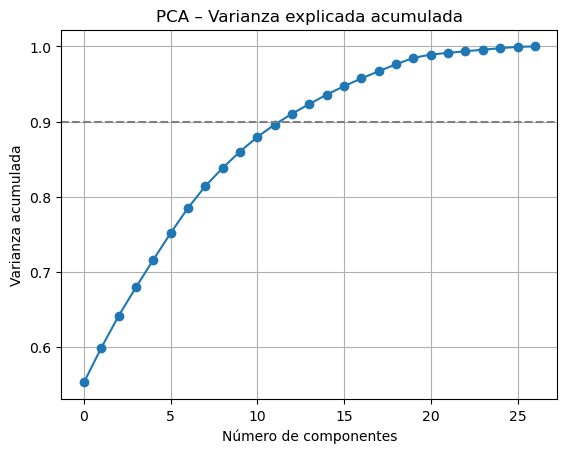

Matriz PCA Z shape: (1000, 13)


In [25]:
# ------------------ 1) Carga y preparación ------------------

pca_full = PCA(svd_solver="full", random_state=42)
pca_full.fit(Xz)

expl_var = pca_full.explained_variance_ratio_
cum_var = np.cumsum(expl_var)
n90 = int(np.argmax(cum_var >= 0.90) + 1)  # componentes para ≥90% varianza

print(f"Componentes PCA para ≥90% varianza: {n90} / {Xz.shape[1]}")
print("Varianza explicada acumulada (primeros 10):",
      np.round(cum_var[:10], 3))

# (Opcional) gráfico de varianza
plt.figure()
plt.plot(cum_var, marker="o")
plt.axhline(0.90, ls="--", c="gray")
plt.title("PCA – Varianza explicada acumulada")
plt.xlabel("Número de componentes"); plt.ylabel("Varianza acumulada")
plt.grid(True); plt.show()

# Transformar con n90 componentes
pca = PCA(n_components=n90, svd_solver="full", random_state=42)
Z = pca.fit_transform(Xz)          # matriz para clustering
print("Matriz PCA Z shape:", Z.shape)

In [18]:
df_work.head(100)

,study_hours_wk,sleep_hours,attendance_rate,assignments_on_time_rate,procrastination_index,self_efficacy,stress,part_time_job_hours,social_support,screen_time_nonstudy_hr,...,grade_Matemáticas_prior_20,grade_Matemáticas_current_20,grade_Programación_prior_20,grade_Programación_current_20,grade_Comunicación_prior_20,grade_Comunicación_current_20,grade_Estadística_prior_20,grade_Estadística_current_20,grade_Ética_prior_20,grade_Ética_current_20
0,19.490142,7.868110,0.948021,0.301609,0.124371,4.461492,2.367064,4.350423,4.600266,0.992667,...,18.32,18.42,17.19,18.41,19.10,18.14,18.79,20.00,18.68,17.01
1,17.585207,8.197278,0.976993,0.200000,0.314398,4.290322,2.571332,9.970518,4.070180,0.618859,...,17.58,18.43,18.14,16.87,18.06,18.06,18.98,20.00,18.88,20.00
2,19.943066,8.751610,0.905091,0.200000,0.392284,3.938519,2.712673,4.734963,3.016465,0.544275,...,17.77,18.31,16.72,15.72,17.29,17.82,16.24,15.14,18.01,18.68
3,22.569090,7.057311,0.965296,0.200000,0.336274,4.429744,2.787129,3.372941,3.441407,0.851187,...,17.87,17.84,16.87,18.63,16.50,17.38,18.53,17.02,19.07,19.42
4,17.297540,9.079820,0.956658,0.375194,0.369526,3.828384,2.733363,5.843603,3.907077,1.303685,...,16.58,18.78,15.77,15.59,16.49,16.89,16.42,16.01,16.11,15.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13.609455,7.339591,0.929918,0.399779,0.490731,3.771991,1.908445,5.336681,3.623782,3.237080,...,16.14,18.35,15.87,15.77,16.70,15.73,16.57,16.67,15.91,15.17
96,18.888361,8.323392,0.909151,0.200000,0.497380,4.055292,2.114267,2.531652,3.266607,2.562139,...,17.70,18.20,17.15,17.16,15.54,15.64,17.83,17.04,17.61,19.16
97,18.783166,7.910005,0.978334,0.200000,0.395004,4.285185,2.924634,4.163991,3.749299,1.536589,...,19.68,20.00,17.72,17.96,18.31,20.00,18.53,19.36,16.92,17.13
98,18.015340,9.113882,0.959752,0.200000,0.372888,4.128279,2.557537,4.914561,4.487656,1.813173,...,16.44,18.50,18.80,18.45,18.42,18.86,17.58,17.70,18.06,19.03



Mejor K por silueta: 2 (silueta=0.3193)


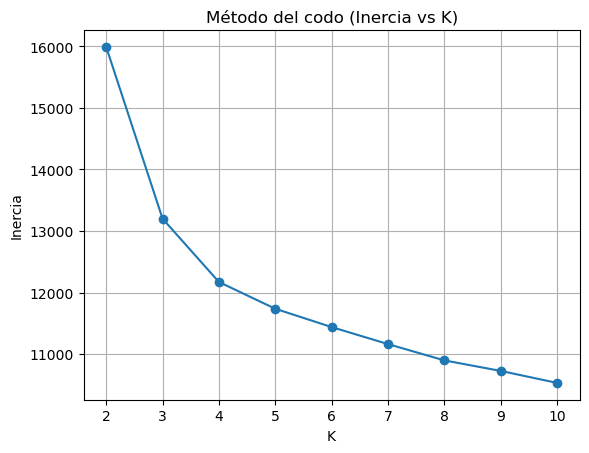

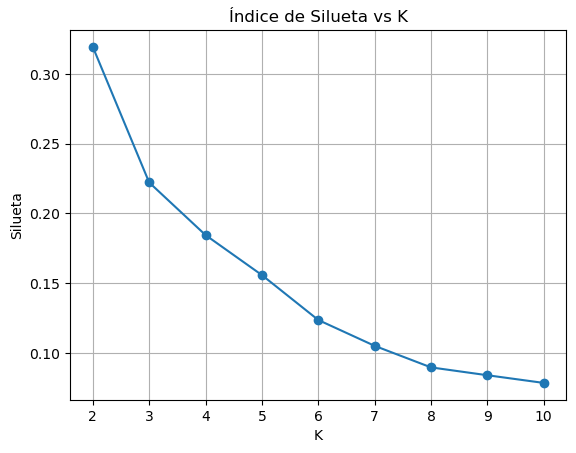

In [20]:
# ------------------ 2) Selección de K (codo + silueta) ------------------
K_RANGE = range(2, 11)
inertias, silhouettes = [], []

for k in K_RANGE:
    km = KMeans(n_clusters=k, init="k-means++", max_iter=300, n_init=10, random_state=42)
    lab = km.fit_predict(Xz)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(Xz, lab))

best_k = int(K_RANGE[np.argmax(silhouettes)])
print(f"\nMejor K por silueta: {best_k} (silueta={max(silhouettes):.4f})")

# Plots (opcional)
plt.figure()
plt.plot(list(K_RANGE), inertias, marker="o")
plt.title("Método del codo (Inercia vs K)")
plt.xlabel("K"); plt.ylabel("Inercia"); plt.grid(True); plt.show()

plt.figure()
plt.plot(list(K_RANGE), silhouettes, marker="o")
plt.title("Índice de Silueta vs K")
plt.xlabel("K"); plt.ylabel("Silueta"); plt.grid(True); plt.show()

##### 🧭 ¿Qué significa?

 ✅ Si elegimos **K=2**:
- Tus estudiantes se dividen en **dos perfiles grandes y bien separados**.  
- **Ejemplo de perfiles:**
  - *Estudiantes organizados*  
  - *Estudiantes con dificultades*  

---

 ✅ Si elegimos **K=3 o K=4**:
- Obtienes **más detalle**, pero los grupos se parecen más entre sí.  
- **Ejemplo de perfiles:**
  - *Alto rendimiento*  
  - *Pasivos pero estables*  
  - *Con dificultades*  
  - *Con carga laboral*  


In [22]:
# ------------------ 3) Entrenar modelo final ------------------
# Forzar K=4 aunque el mejor por silueta haya sido otro
chosen_k = 4

kmeans = KMeans(n_clusters=chosen_k, init="k-means++", max_iter=300, n_init=10, random_state=42)
labels = kmeans.fit_predict(Xz)
centers_z = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers_z)

# Métrica de calidad para reportar con K=4 (opcional, muy recomendable)
from sklearn.metrics import silhouette_score
sil_chosen = silhouette_score(Xz, labels)
print(f"\nK elegido = {chosen_k} | Silueta = {sil_chosen:.4f} | Iteraciones = {kmeans.n_iter_}")

# Distancias de cada punto a cada centro (en z-space)
from scipy.spatial.distance import cdist
D = cdist(Xz.values, centers_z, metric="euclidean")

df_work["cluster_id"] = labels
df_out = df_work.copy()
df_out["cluster_id"] = labels

print("\nTamaño por clúster:")
print(df_work["cluster_id"].value_counts().sort_index())


K elegido = 4 | Silueta = 0.1845 | Iteraciones = 7

Tamaño por clúster:
cluster_id
0    279
1    211
2    228
3    282
Name: count, dtype: int64


##### 📊 Lo que obtuviste en el paso 3

K elegido = 4 → trabajas con 4 clústeres.

Silueta = 0.1845 → los clústeres existen pero no están muy separados (hay solapamiento).

Iteraciones = 7 → el algoritmo convergió bien.

Tamaño de clústeres →

Cluster 0: 279

Cluster 1: 211

Cluster 2: 228

Cluster 3: 282
👉 Están balanceados (ninguno muy chico, entre 21% y 28%).